<a href="https://colab.research.google.com/github/sevinduImsara/ML_CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install ucimlrepo

# **Import libraries**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# **Fetch dataset from git**

In [95]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# **Merge "Y" column with "X"**

In [96]:
X["income"] = y

# **Save to CSV**

In [97]:
X.to_csv("Data_Analysis")

# **Deal with dataset**

In [98]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [99]:
X.shape

(48842, 15)

In [100]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **Checking Unique value**

In [102]:
# check updated unique values in each columns
for column in X:
    print(column)
    print(X[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support

# **Merge 4 income category into 2**

In [103]:
X["income"].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [104]:
X["income"]= X['income'].replace('<=50K.','<=50K')
X["income"]= X['income'].replace('>50K.','>50K')

In [105]:
X['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

# **Checking value counts**

In [106]:
X['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [107]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [108]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [109]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

# **replace ? with Nan**

In [110]:
specific_line = X.iloc[27]
print(specific_line)

age                               54
workclass                          ?
fnlwgt                        180211
education               Some-college
education-num                     10
marital-status    Married-civ-spouse
occupation                         ?
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


In [111]:
X.replace('?',np.NaN,inplace = True)
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
specific_line = X.iloc[27]
print(specific_line)

age                               54
workclass                        NaN
fnlwgt                        180211
education               Some-college
education-num                     10
marital-status    Married-civ-spouse
occupation                       NaN
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


# **Check null**

In [113]:
nun_val= X.isnull().sum()
Tot_nun_val=nun_val.sum()
print(nun_val)
print("Total Nun Value : ", Tot_nun_val)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64
Total Nun Value :  6465


# **Replacing Nan with mode filling**

In [114]:
# Calculate mode of the column
mode_value = X['workclass'].mode()[0]
mode_value = X['occupation'].mode()[0]
mode_value = X['native-country'].mode()[0]
X['workclass'].fillna(mode_value, inplace=True)
X['occupation'].fillna(mode_value, inplace=True)
X['native-country'].fillna(mode_value, inplace=True)

In [115]:
nun_val= X.isnull().sum()
print(nun_val)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# **Checking For Duplicates**

In [116]:
print(X.duplicated().sum())

X= X.drop_duplicates()

52


In [117]:
print(X.duplicated().sum())

0


In [118]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Features Vs Income Graphs**

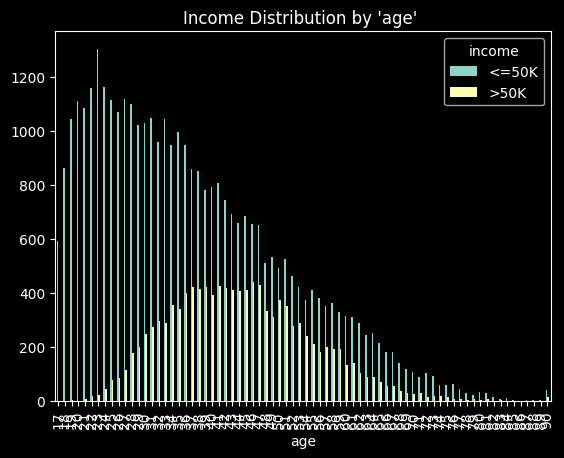

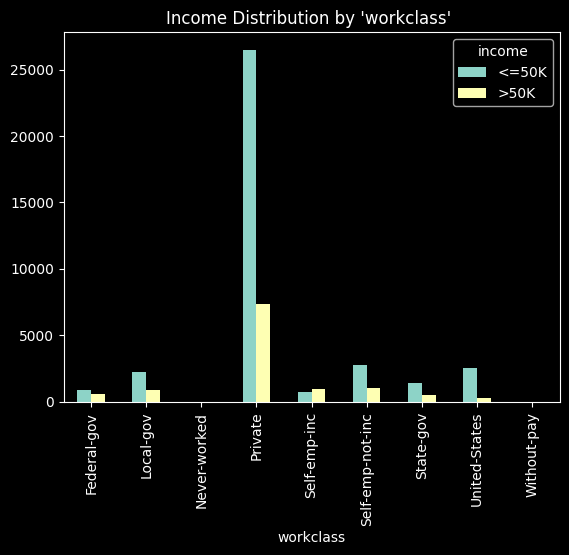

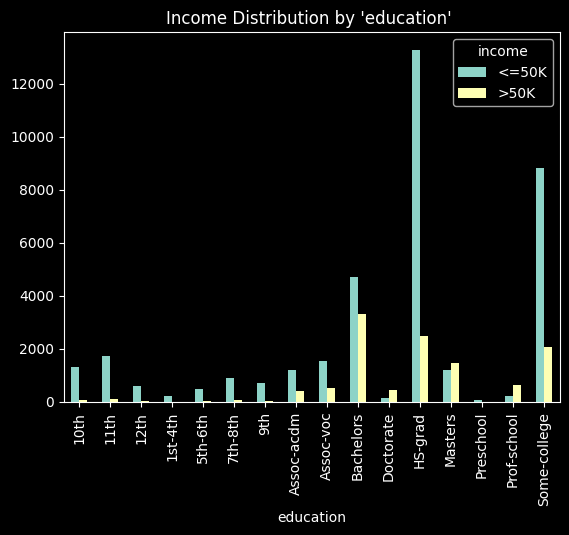

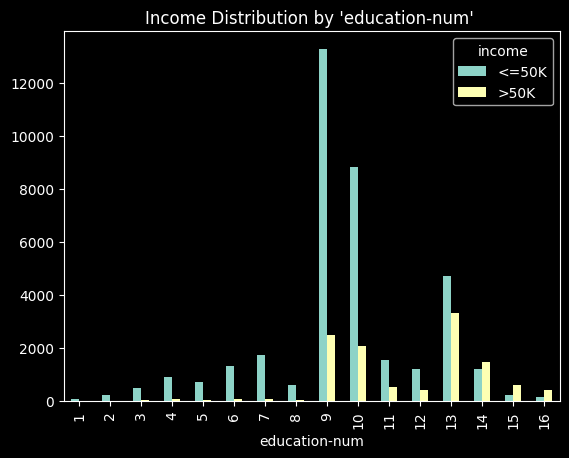

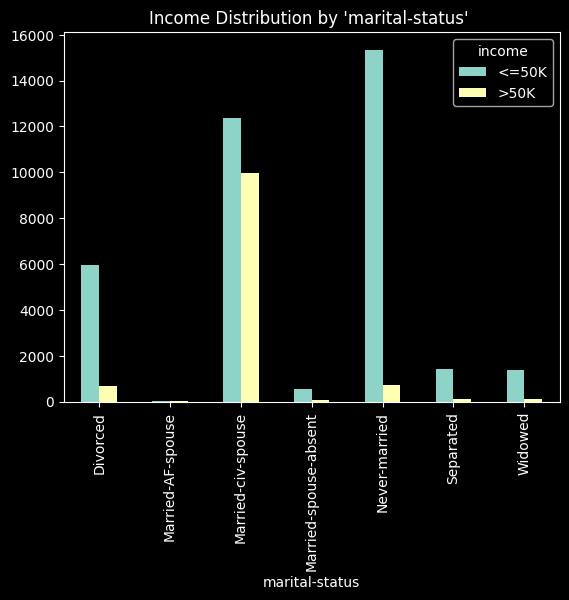

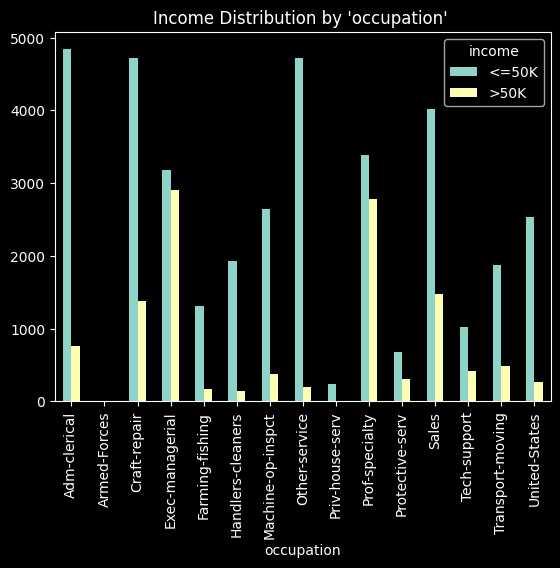

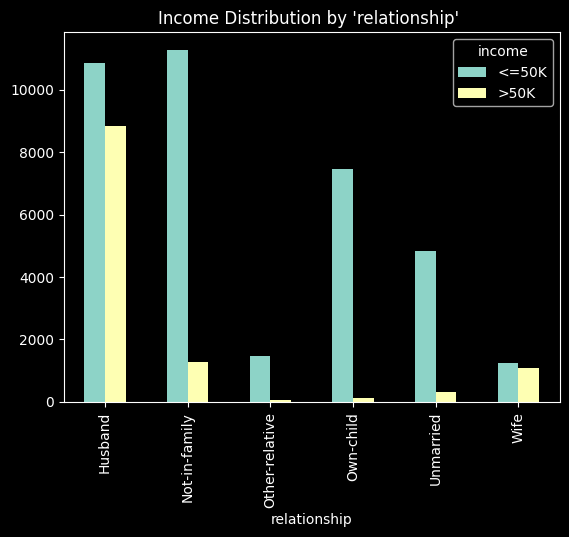

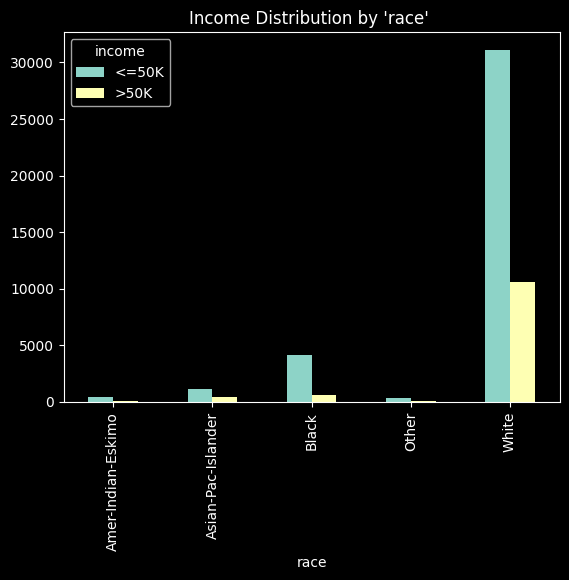

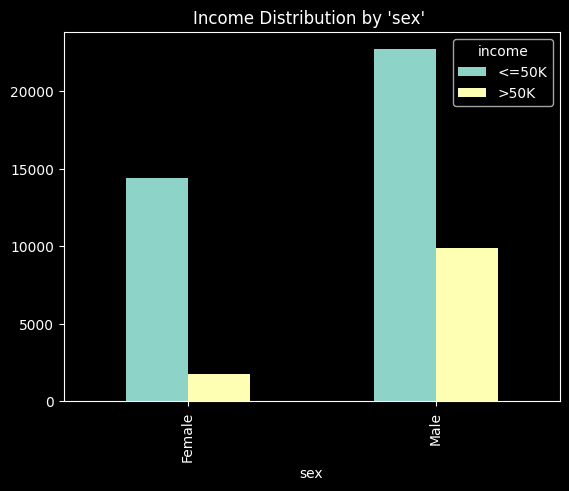

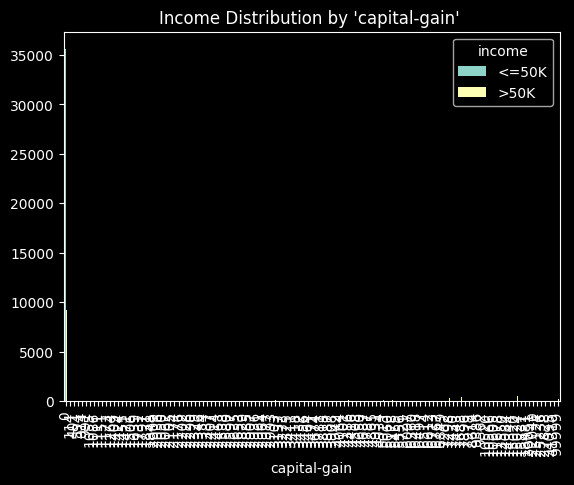

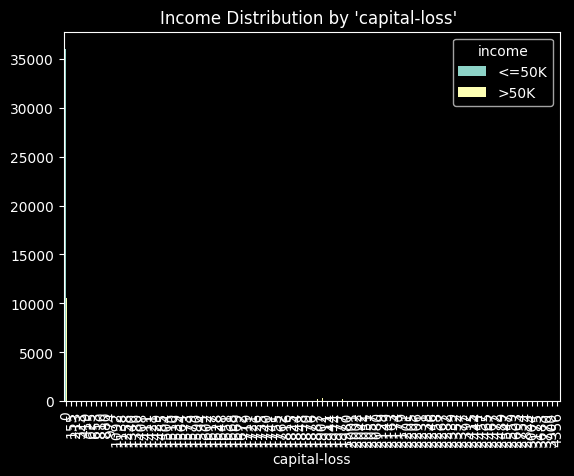

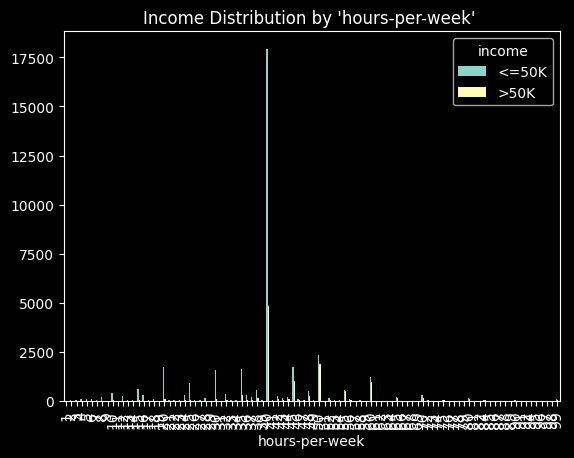

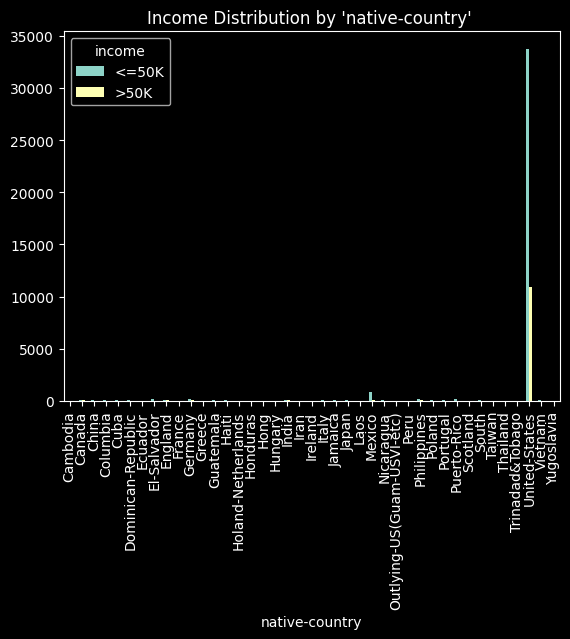

In [119]:
# Display box plots of numerical features against income
features = ["age","workclass","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week" ,"native-country"]
for feature in features:
    pd.crosstab(X[feature], X['income']).plot(kind='bar')
    plt.title("Income Distribution by '{}' ".format(feature))
    plt.xticks(rotation= 90)
    plt.show()

# **Checking outliers**

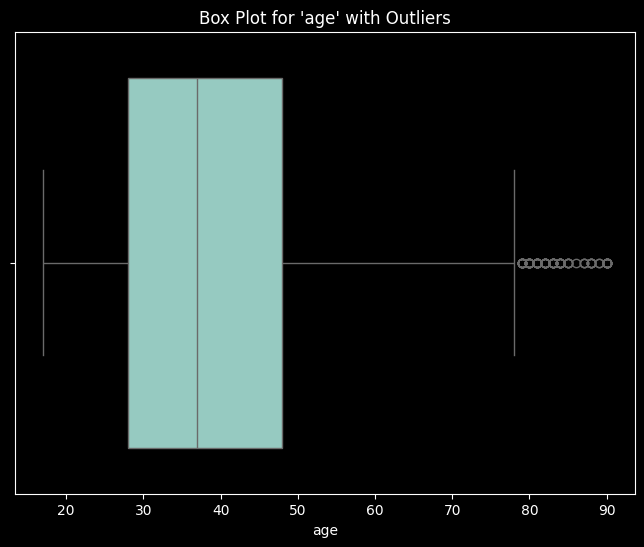

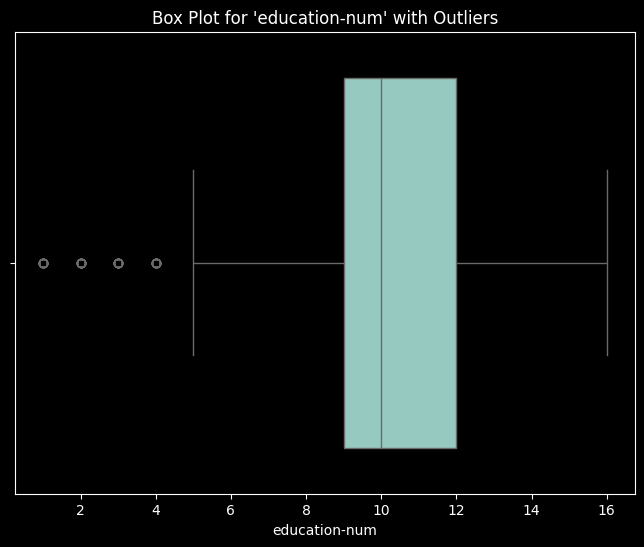

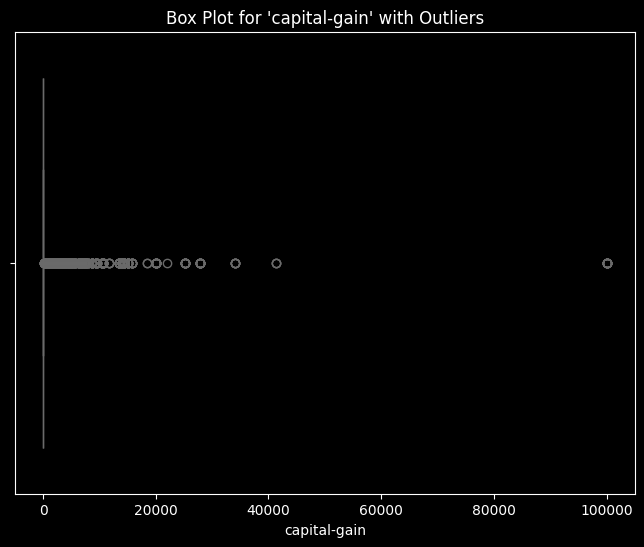

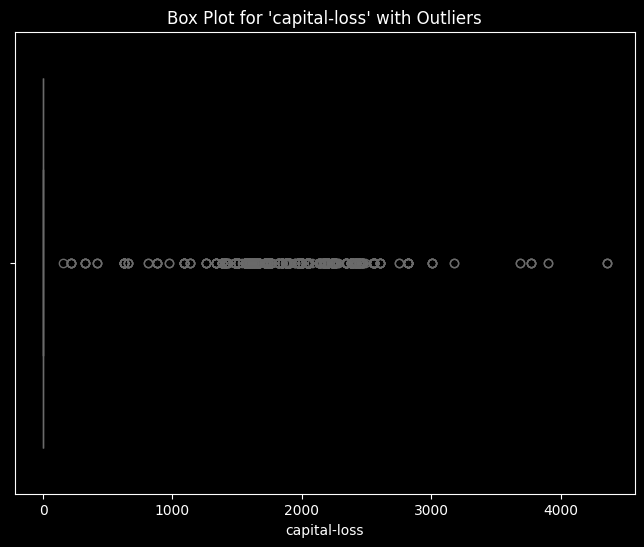

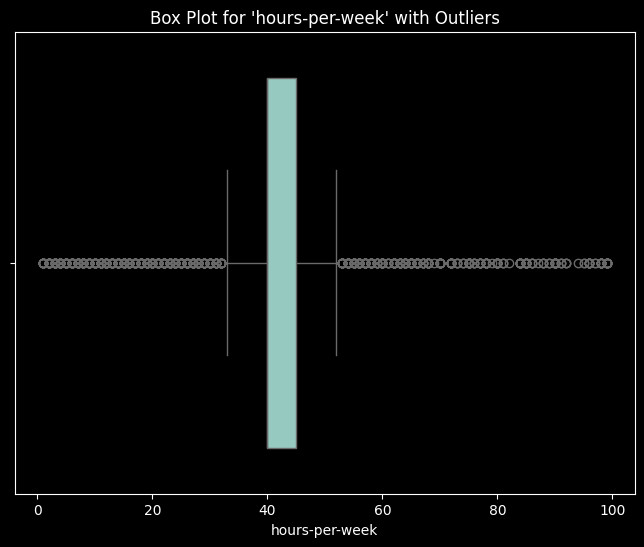

In [120]:
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers[col] = outlier_indices
    return outliers


# Detect outliers
outlier_indices = detect_outliers_iqr(X, numerical_features)

# Visualize outliers using box plots
for col, indices in outlier_indices.items():
    if len(indices) > 0:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=X[col])
        plt.title("Box Plot for '{}' with Outliers".format(col))
        plt.show()


# **Removing Age Outliers**

In [121]:
def remove_outliers(data):
    Q1_age = np.percentile(data['age'], 25)
    Q3_age = np.percentile(data['age'], 75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    return data[(data['age'] >= lower_bound_age) & (data['age'] <= upper_bound_age)]

# Remove outliers from 'age' column
X_out = remove_outliers(X)

# Check the shape of the dataframe before and after removing outliers
print("Shape of original dataframe:", X.shape)
print("Shape of dataframe after removing outliers from 'age' column:", X_out.shape)

Shape of original dataframe: (48790, 15)
Shape of dataframe after removing outliers from 'age' column: (48575, 15)


In [122]:
X = X_out
X.shape

(48575, 15)

# **plot after removing outliers**

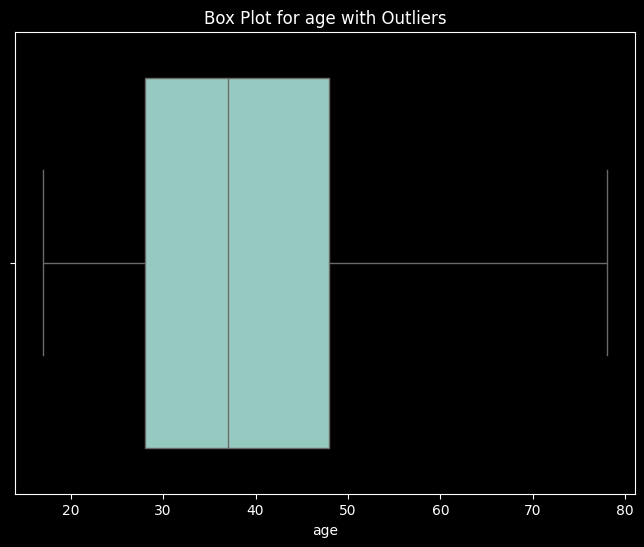

In [123]:
# Function to detect outliers in the 'age' column using IQR method
def detect_outliers_age(data):
    Q1 = np.percentile(data['age'], 25)
    Q3 = np.percentile(data['age'], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
    return outliers
# Detect outliers in the 'age' column
outliers_age = detect_outliers_age(X)

plt.figure(figsize=(8, 6))
sns.boxplot(x=X['age'])
plt.title("Box Plot for age with Outliers".format(col))
plt.show()




# **Grouping**

In [124]:
# Categorize marital status
X['marital-status'] = X['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Separated', 'Married-spouse-absent'], 'Married')
X['marital-status'] = X['marital-status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Not Married')

# Categorize workclass
X['workclass'] = X['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Government')
X['workclass'] = X['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'], 'Self-Employed')
X['workclass'] = X['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')

# Categorize hours-per-week
X['hours-per-week'] = pd.cut(X['hours-per-week'], bins=[0, 34, 40, 99], labels=['Part-time', 'Full-time', 'Over-time'])

# Categorize occupation
X['occupation'] = X['occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'Professional')
X['occupation'] = X['occupation'].replace(['Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Protective-serv', 'Tech-support'], 'Service')
X['occupation'] = X['occupation'].replace(['Sales', 'Craft-repair'], 'Sales')
X['occupation'] = X['occupation'].replace(['Other-service', 'Armed-Forces', 'Priv-house-serv'], 'Others')

# Display the modified DataFrame
X.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Government,77516,Bachelors,13,Not Married,Service,Not-in-family,White,Male,2174,0,Full-time,United-States,<=50K
1,50,Self-Employed,83311,Bachelors,13,Married,Professional,Husband,White,Male,0,0,Part-time,United-States,<=50K
2,38,Private,215646,HS-grad,9,Not Married,Service,Not-in-family,White,Male,0,0,Full-time,United-States,<=50K
3,53,Private,234721,11th,7,Married,Service,Husband,Black,Male,0,0,Full-time,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,0,0,Full-time,Cuba,<=50K


# **Label Encoding**

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['workclass'] = le.fit_transform(X['workclass'])
X['education'] = le.fit_transform(X['education'])
X['marital-status'] = le.fit_transform(X['marital-status'])
X['occupation'] = le.fit_transform(X['occupation'])
X['relationship'] = le.fit_transform(X['relationship'])
X['race'] = le.fit_transform(X['race'])
X['sex'] = le.fit_transform(X['sex'])
X['hours-per-week'] = le.fit_transform(X['hours-per-week'])
X['native-country'] = le.fit_transform(X['native-country'])
X['income'] = le.fit_transform(X['income'])

X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,9,13,1,3,1,4,1,2174,0,0,38,0
1,50,2,83311,9,13,0,1,0,4,1,0,0,2,38,0
2,38,1,215646,11,9,1,3,1,4,1,0,0,0,38,0
3,53,1,234721,1,7,0,3,0,2,1,0,0,0,38,0
4,28,1,338409,9,13,0,1,5,2,0,0,0,0,4,0


# **Correlation matrix**

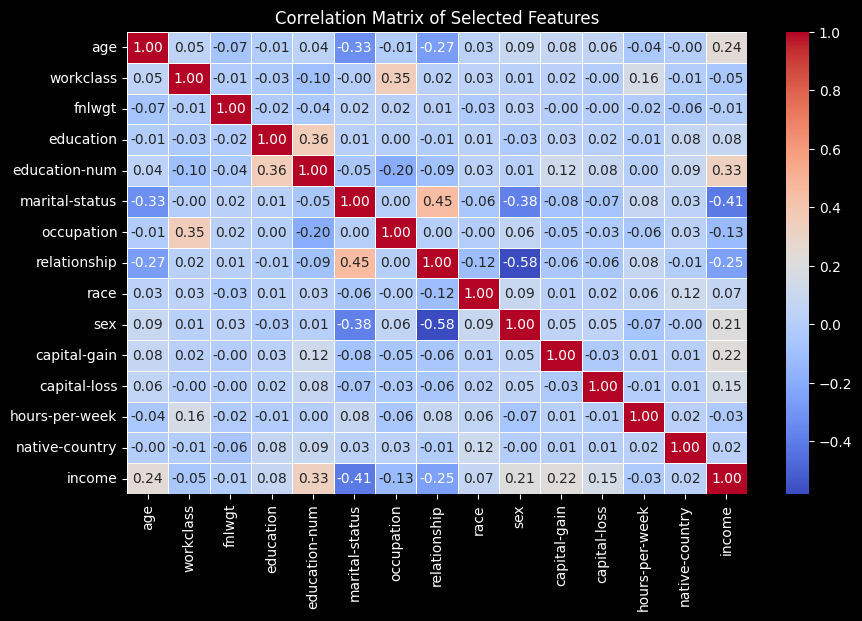

In [126]:
correlation_matrix = X.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# **dropping columns**


In [127]:
X=X.drop(['fnlwgt'], axis = 1)
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,9,13,1,3,1,4,1,2174,0,0,38,0
1,50,2,9,13,0,1,0,4,1,0,0,2,38,0
2,38,1,11,9,1,3,1,4,1,0,0,0,38,0
3,53,1,1,7,0,3,0,2,1,0,0,0,38,0
4,28,1,9,13,0,1,5,2,0,0,0,0,4,0


# **Income Plot**

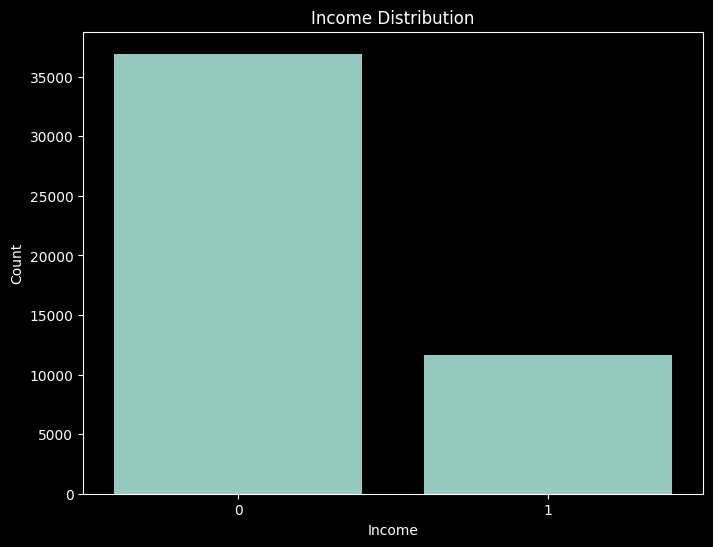

In [128]:
income_counts = X['income'].value_counts()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# **Data set Balancing**

In [129]:
from imblearn.over_sampling import SMOTE

# Create X and y variables

Y = X['income']
X = X.drop('income', axis=1)



# Initialize the RandomOverSampler
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Create a new balanced DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)

# Now, 'balanced_df' contains the balanced dataset

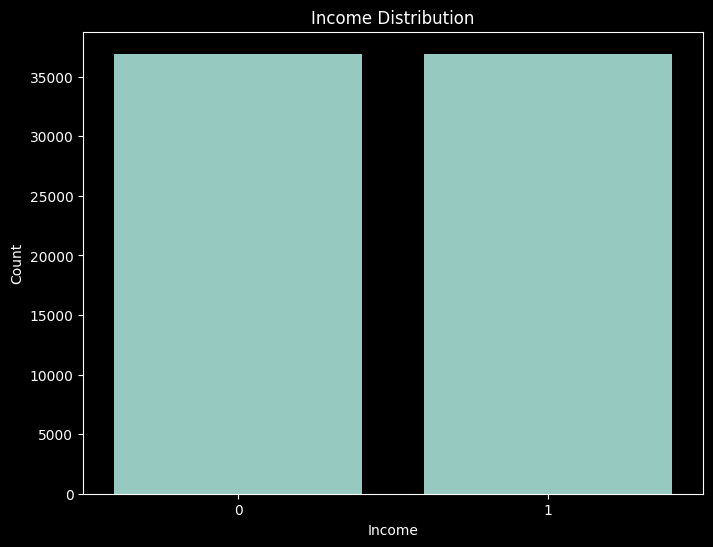

In [130]:
income_counts = df['income'].value_counts()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [131]:
df.shape

(73864, 14)

# **Split features and target**

In [132]:
x = df.drop(['income'], axis = 1)
y = df['income']

In [133]:
x.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,9,13,1,3,1,4,1,2174,0,0,38
1,50,2,9,13,0,1,0,4,1,0,0,2,38
2,38,1,11,9,1,3,1,4,1,0,0,0,38
3,53,1,1,7,0,3,0,2,1,0,0,0,38
4,28,1,9,13,0,1,5,2,0,0,0,0,4


In [134]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

# **Random Forest Classifire & Gaussian Naive Bayes Classifier**

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
#training accuracy
rf_train = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train)
# Test Random Forest Classifier
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Training Accuracy:", rf_train_accuracy)
print("Random Forest Classifier Testing Accuracy:", rf_accuracy)


Random Forest Classifier Training Accuracy: 0.9371308659525139
Random Forest Classifier Testing Accuracy: 0.86644554254383


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7359
           1       0.84      0.90      0.87      7414

    accuracy                           0.87     14773
   macro avg       0.87      0.87      0.87     14773
weighted avg       0.87      0.87      0.87     14773



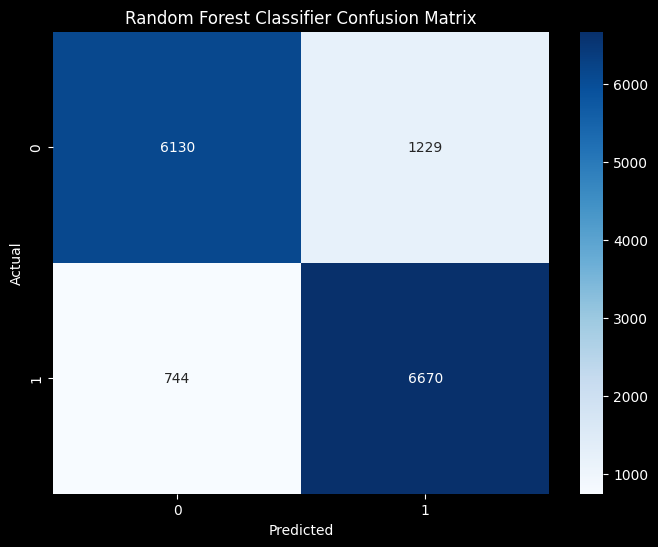

In [136]:
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))
#confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [137]:
# Train Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
#training accuracy
nb_train = nb_classifier.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train)
# Test Gaussian Naive Bayes Classifier
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Gaussian Naive Bayes Classifier Training Accuracy:",nb_train_accuracy)
print("Gaussian Naive Bayes Classifier Testing Accuracy:",nb_accuracy)


Gaussian Naive Bayes Classifier Training Accuracy: 0.7067404511685367
Gaussian Naive Bayes Classifier Testing Accuracy: 0.7081838489135586


Gaussian Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      7359
           1       0.88      0.49      0.63      7414

    accuracy                           0.71     14773
   macro avg       0.76      0.71      0.69     14773
weighted avg       0.76      0.71      0.69     14773



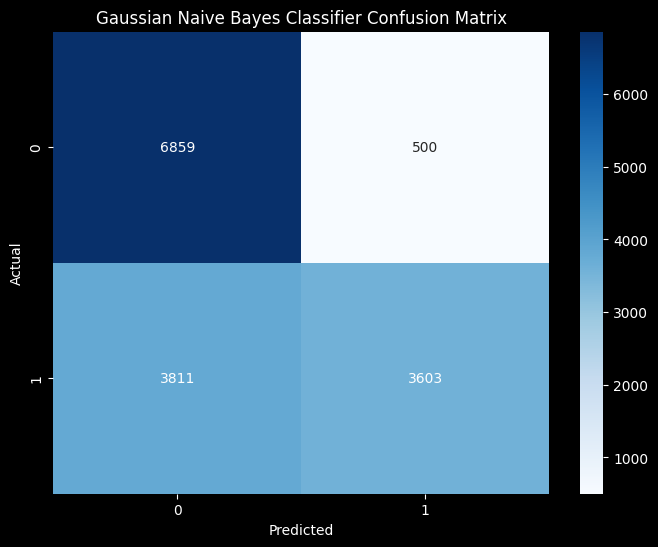

In [138]:
print("Gaussian Naive Bayes Classifier Classification Report:")
print(classification_report(y_test, nb_predictions))
# confusion matrix
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Gaussian Naive Bayes Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()